In [6]:
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/sg_2018.csv")

In [3]:
df

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Fill Flag,...,Temperature,Dew Point,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Wind Speed
0,2018,1,1,0,0,0,0,0,7,0,...,25.9,25.5,0,0,0,97.47,0.14,1009,339,2.8
1,2018,1,1,1,0,0,0,0,6,0,...,25.8,25.3,0,0,0,97.36,0.14,1008,341,3.0
2,2018,1,1,2,0,0,0,0,7,0,...,25.7,25.2,0,0,0,97.03,0.14,1008,345,3.2
3,2018,1,1,3,0,0,0,0,7,0,...,25.6,25.1,0,0,0,96.91,0.14,1007,347,3.3
4,2018,1,1,4,0,0,0,0,6,0,...,25.5,24.9,0,0,0,96.74,0.14,1007,348,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,12,31,19,0,10,9,10,7,3,...,26.9,25.9,5,7,5,94.11,0.14,1009,358,2.2
8756,2018,12,31,20,0,0,0,0,7,0,...,26.6,25.8,0,0,0,95.50,0.14,1010,356,2.3
8757,2018,12,31,21,0,0,0,0,7,0,...,26.3,25.7,0,0,0,96.76,0.14,1010,349,2.3
8758,2018,12,31,22,0,0,0,0,6,0,...,26.2,25.7,0,0,0,96.92,0.14,1010,342,2.4


In [5]:
series = TimeSeries.from_csv("data/sg_2018.csv", value_cols="GHI", freq="H")

In [106]:
train, val = series[:-7100], series[1660:-6500]
print(len(train))
print(len(val))

1660
600


In [107]:
from darts.models import FFT

model = FFT()
model.fit(train)
prediction = model.predict(len(val))

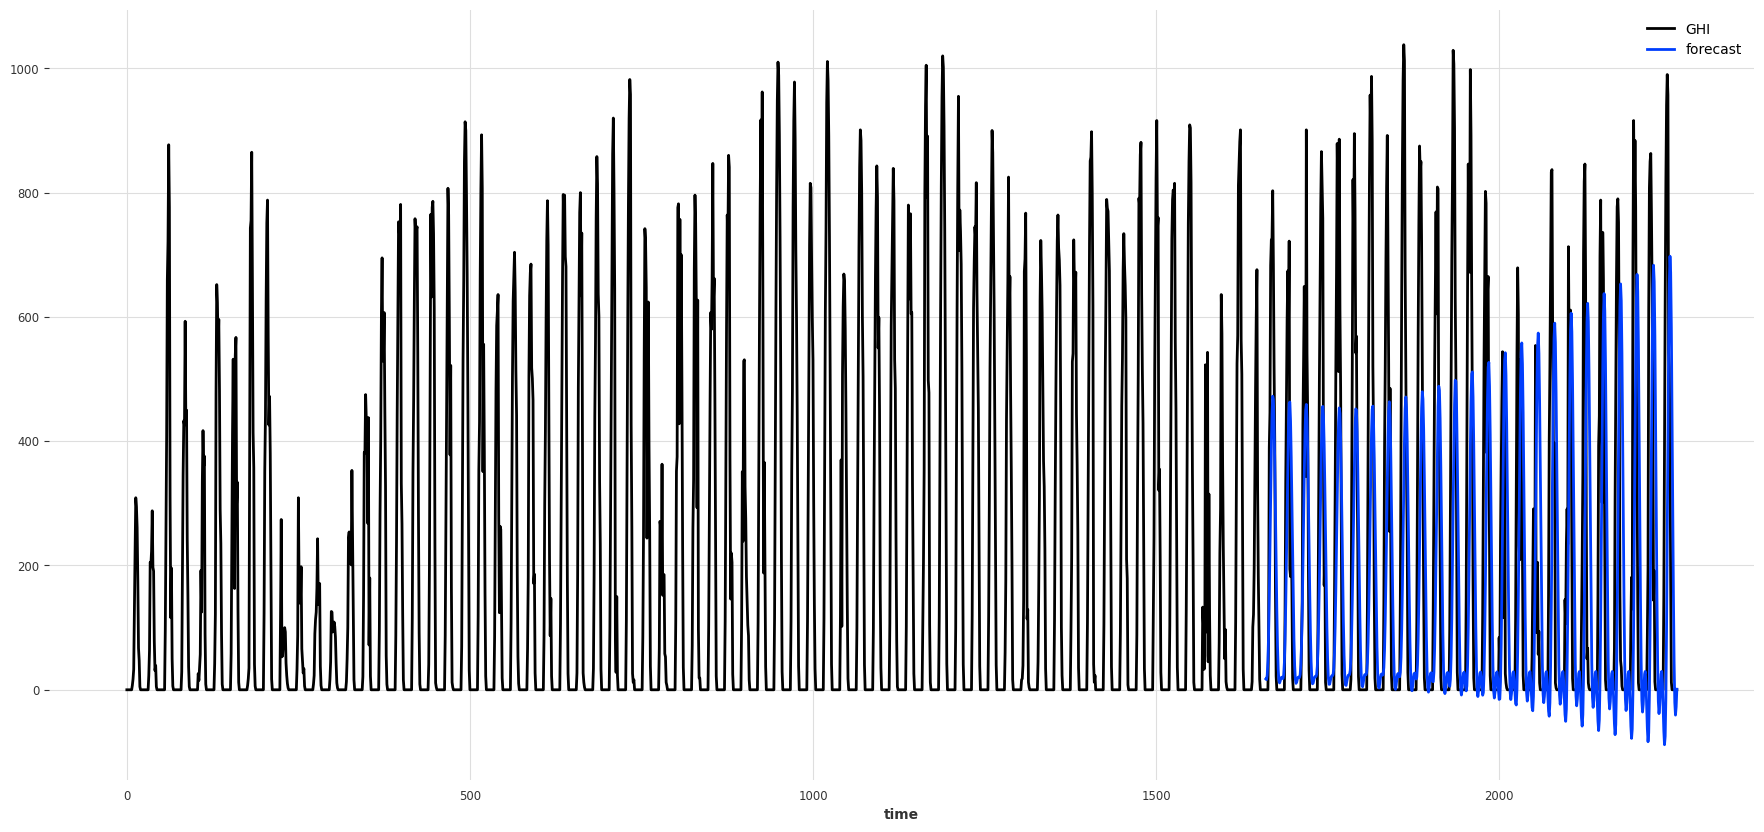

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
series[:-6500].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
